## Pricing with Fourier approach

### 1- Black Scholes Eur

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from pricing_python.diffusion import BlackScholesProcess
from pricing_python.european import eur_bs_analytical_price, eur_fourier_price

In [2]:
sigma = 0.2
riskfree = 0.05
maturity = 1
S0 = 100
K = 110
model = BlackScholesProcess(sigma=sigma)

In [ ]:
# Eur call

npv_analytical, npv_fourier_5, npv_fourier_10, npv_fourier_15 = [], [], [], []
s_vals = list(range(50, 160))

strtime = datetime.now()
for s in s_vals:
    npv_analytical.append(eur_bs_analytical_price(s, K, riskfree, sigma, maturity, call=True))
t1 = datetime.now()
for s in s_vals:
    npv_fourier_5.append(eur_fourier_price(model, s, K, riskfree, maturity, call=True, n_coef=5))
t2 = datetime.now()
for s in s_vals:
    npv_fourier_15.append(eur_fourier_price(model, s, K, riskfree, maturity, call=True, n_coef=15))
t3 = datetime.now()
for s in s_vals:
    npv_fourier_30.append(eur_fourier_price(model, s, K, riskfree, maturity, call=True, n_coef=30))
endtime = datetime.now()
    
mae_5 = np.mean(np.abs(np.array(npv_fourier_5)-np.array(npv_analytical)))
mae_10 = np.mean(np.abs(np.array(npv_fourier_10)-np.array(npv_analytical)))
mae_15 = np.mean(np.abs(np.array(npv_fourier_15)-np.array(npv_analytical)))

In [ ]:
textstr = '\n'.join((
    r'Fourier 5 coef: MAE {},  Solving exec. {}s'.format(np.round(mae_5, 5), np.round((t2-t1).total_seconds(), 4)),
    r'Fourier 10 coef: MAE {},  Solving exec. {}s'.format(np.round(mae_10, 4), np.round((t3-t2).total_seconds(), 4)),
    r'Fourier 15 coef:     MAE {},  Solving exec. {}s'.format(np.round(mae_15, 6), np.round((endtime-t3).total_seconds(), 4))))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

plt.figure()
plt.figure(figsize = (10,6))
plt.plot(s_vals, npv_analytical, color='black', label='BS Analytical')
plt.plot(s_vals, npv_fourier_5, label='Fourier 5 coef')
plt.plot(s_vals, npv_fourier_10, label='Fourier 10 coef')
plt.plot(s_vals, npv_fourier_15, label='Fourier 15 coef')
plt.text(0.0, 80., textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.legend(prop={"size":13})
plt.title("Call option values at t=0", fontsize=14)
plt.xlabel("Underlying price", fontsize=14)
plt.ylabel("Option value", fontsize=14)
plt.show()

In [3]:
# Eur put
npv_analytical, npv_fourier_5, npv_fourier_15, npv_fourier_30 = [], [], [], []
s_vals = list(range(50, 160))

strtime = datetime.now()
for s in s_vals:
    npv_analytical.append(eur_bs_analytical_price(s, K, riskfree, sigma, maturity, call=False))
t1 = datetime.now()
for s in s_vals:
    npv_fourier_5.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=5))
t2 = datetime.now()
for s in s_vals:
    npv_fourier_15.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=15))
t3 = datetime.now()
for s in s_vals:
    npv_fourier_30.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=30))
endtime = datetime.now()

In [4]:
mae_5 = np.mean(np.abs(np.array(npv_fourier_5)-np.array(npv_analytical)))
mae_15 = np.mean(np.abs(np.array(npv_fourier_15)-np.array(npv_analytical)))
mae_30 = np.mean(np.abs(np.array(npv_fourier_30)-np.array(npv_analytical)))

<Figure size 432x288 with 0 Axes>

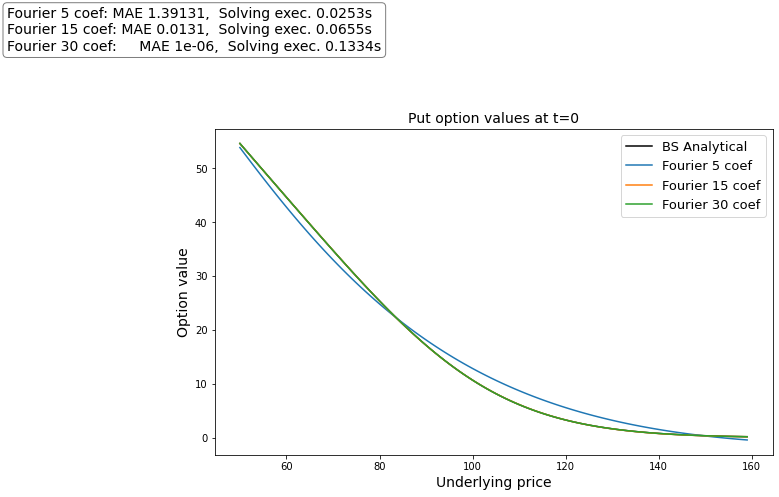

In [5]:
textstr = '\n'.join((
    r'Fourier 5 coef: MAE {},  Solving exec. {}s'.format(np.round(mae_5, 5), np.round((t2-t1).total_seconds(), 4)),
    r'Fourier 15 coef: MAE {},  Solving exec. {}s'.format(np.round(mae_15, 4), np.round((t3-t2).total_seconds(), 4)),
    r'Fourier 30 coef:     MAE {},  Solving exec. {}s'.format(np.round(mae_30, 6), np.round((endtime-t3).total_seconds(), 4))))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

plt.figure()
plt.figure(figsize = (10,6))
plt.plot(s_vals, npv_analytical, color='black', label='BS Analytical')
plt.plot(s_vals, npv_fourier_5, label='Fourier 5 coef')
plt.plot(s_vals, npv_fourier_15, label='Fourier 15 coef')
plt.plot(s_vals, npv_fourier_30, label='Fourier 30 coef')
plt.text(0.0, 80., textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.legend(prop={"size":13})
plt.title("Put option values at t=0", fontsize=14)
plt.xlabel("Underlying price", fontsize=14)
plt.ylabel("Option value", fontsize=14)
plt.show()


### 2- Heston Eur

In [2]:
from pricing_python.diffusion import HestonProcess
from pricing_python.european import eur_heston_price, eur_mc_price

v_init= 0.3
v = 0.6
kappa = 1
gamma = 0.1
rho = -0.3
model = HestonProcess(v_init, v, kappa, gamma, rho)

In [6]:
npv_mc, std_mc = [], []
s_vals = range(50, 160,10)

riskfree = 0.05
maturity = 1
S0 = 100
K = 110

strtime = datetime.now()
for s in range(50, 160,10):
    print(s)
    npv_mc.append(eur_mc_price(model, s, K, riskfree, maturity, call=False, n_path=10000, n_step=5000)[0])
    std_mc.append(eur_mc_price(model, s, K, riskfree, maturity, call=False, n_path=10000, n_step=5000)[1])
endtime = datetime.now()
print('exec time MC', (endtime-strtime).total_seconds())
print(npv_mc)
print(std_mc)

50
60
70
80
90
100
110
120
130
140
150
exec time MC 769.320945
[81.18710497035053, 77.22884911991238, 74.0646482344126, 70.98266149689589, 68.51791879190675, 66.49534202957707, 64.62779493960224, 62.925247727836435, 61.450006183451706, 60.09797604708924, 59.269952541902526]
[0.13122969848654484, 0.13853841863680644, 0.14298971172173172, 0.14295743551502227, 0.1400159997573363, 0.13676536197575195, 0.13049368824493898, 0.12316427198053813, 0.11848965549653151, 0.1105568307206946, 0.10573963869258733]


<Figure size 432x288 with 0 Axes>

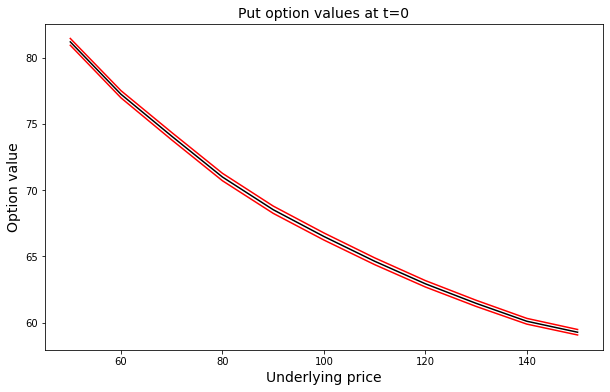

In [9]:
npv_mc = np.array(npv_mc)
conf_sup = np.array([npv_mc[i]+1.96*std_mc[i] for i in range(len(npv_mc))])
conf_inf = np.array([npv_mc[i]-1.96*std_mc[i] for i in range(len(npv_mc))])

plt.figure()
plt.figure(figsize = (10,6))
plt.plot(s_vals, npv_mc, color='black', label='MC rice')
plt.plot(s_vals, conf_sup, color='red', linestyle='-', label='conf inf')
plt.plot(s_vals, conf_inf, color='red', linestyle='-',label='conf sup')
plt.title("Put option values at t=0", fontsize=14)
plt.xlabel("Underlying price", fontsize=14)
plt.ylabel("Option value", fontsize=14)
plt.show()

In [ ]:
npv_fourier = []

s_vals = range(50, 160,10)

riskfree = 0.05
maturity = 1
S0 = 100
K = 110

strtime = datetime.now()
for s in s_vals:
    print(s)
    npv_fourier.append(eur_fourier_price(model, S0, K, riskfree, maturity, call=False, n_coef=10))
    
endtime = datetime.now()